## Macroeconomics and Real Estate: 1929 and Today

### Timothy H. Savage, Ph.D. CRE

#### Professor of Real Estate | NYU Schack Institute of Real Estate

#### Faculty Coordinator | Data Analytics

#### Faculty Director | Hirsh Fellows

#### Distinguished Fellow | NAIOP Research Foundation

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


## 1929 and the Great Depression

* Policy-makers had little to **little or no data**
* **Cowles Commission** and **National Accounts**
    * Large-scale macroeconometric models for policy-making that failed in an era of stagflation
    * Microeconomic approaches begin to prevail
        * Natural experiments
        * Randomized control trials
        * Algorithmic counterfactuals
* Federal Reserve now relies on **real-time data** to gauge economic activity
    * Credit card and smart phone **data**

## CRE Was Faced with Tech Disruption Before COVID-19

* The economics of aggolomeration driving density
* Amazon and e-commerce driving distribution efficiency
* WeWork and co-working driving optionality in CRE

## COVID-19 Will Accelerate These Disruptions


* Capital allocation in CRE is akin to bond trading prior to BSM
* Algorithms will be deployed
* We have 160 observations to help you allocate billions!

## The Current Economic Cycle

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

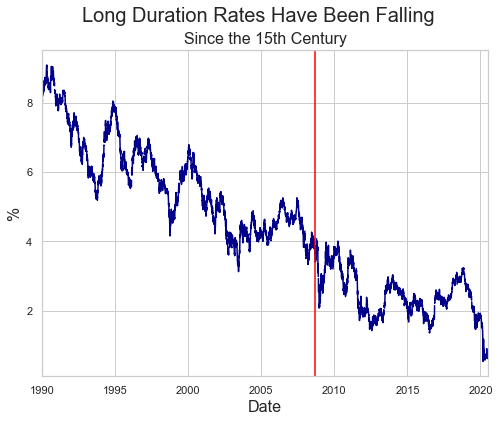

In [3]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Have Been Falling', fontsize=20)
plt.title('Since the 15th Century', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")


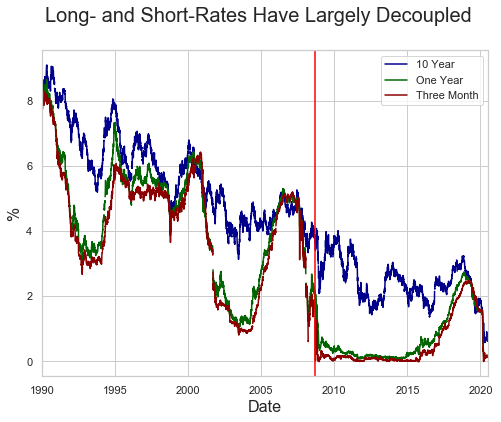

In [4]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
one_year.plot(c='darkgreen', label='One Year')
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

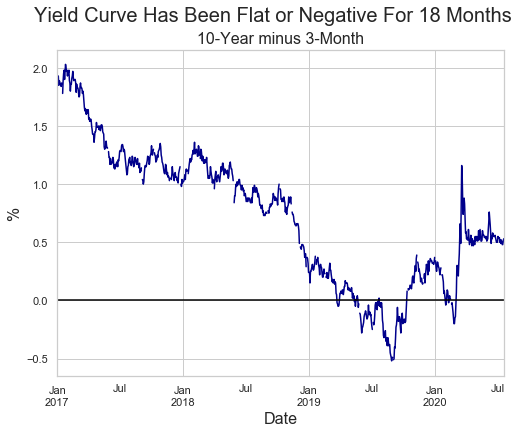

In [5]:
yield_curve = fred.get_series("T10Y3M", observation_start='2017-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Yield Curve Has Been Flat or Negative For 18 Months', fontsize=20)
plt.title('10-Year minus 3-Month', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

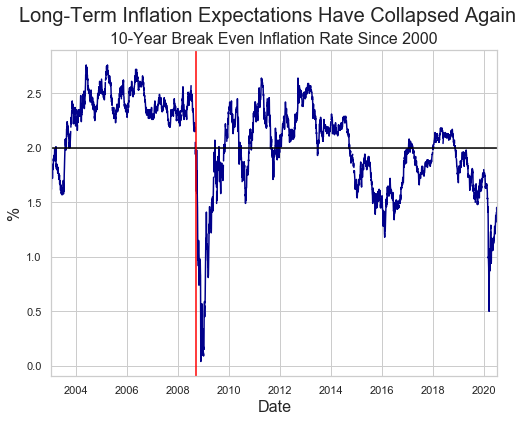

In [6]:
break_even = fred.get_series("T10YIE", observation_start='1990-01-01')
break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long-Term Inflation Expectations Have Collapsed Again', fontsize=20)
plt.title('10-Year Break Even Inflation Rate Since 2000', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

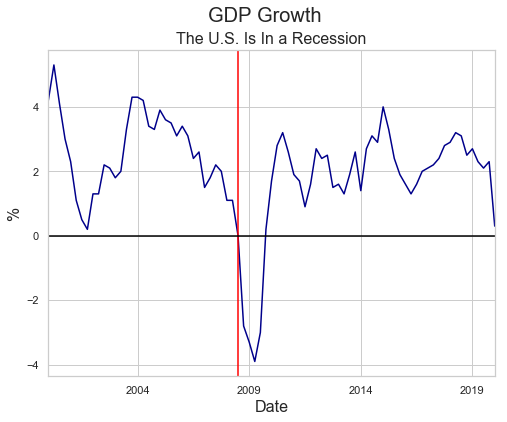

In [7]:
growth = fred.get_series("A191RO1Q156NBEA", observation_start='2000-01-01')
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('GDP Growth', fontsize=20)
plt.title('The U.S. Is In a Recession', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axhline(0, color='black')

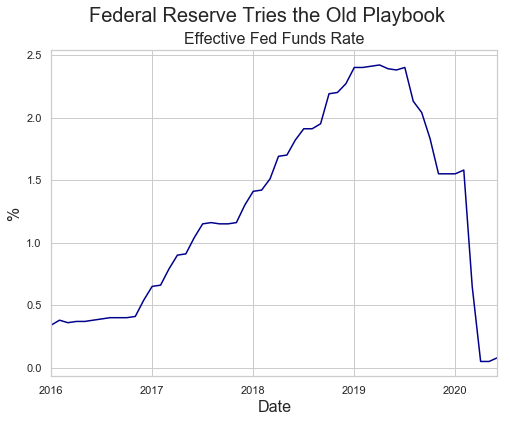

In [8]:
fed_funds = fred.get_series("FEDFUNDS", observation_start='2016-01-01')
fed_funds.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Reserve Tries the Old Playbook', fontsize=20)
plt.title('Effective Fed Funds Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

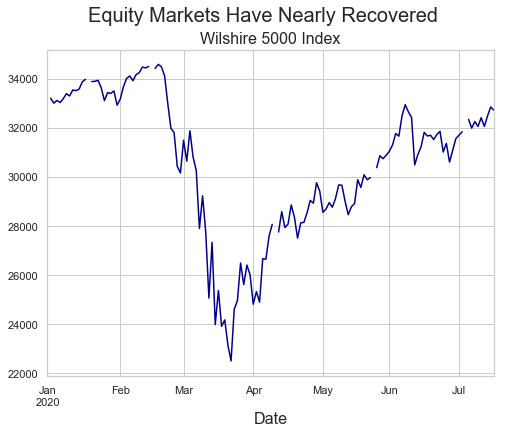

In [9]:
wilshire = fred.get_series("WILL5000PR", observation_start='2020-01-01')
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Equity Markets Have Nearly Recovered', fontsize=20)
plt.title('Wilshire 5000 Index', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

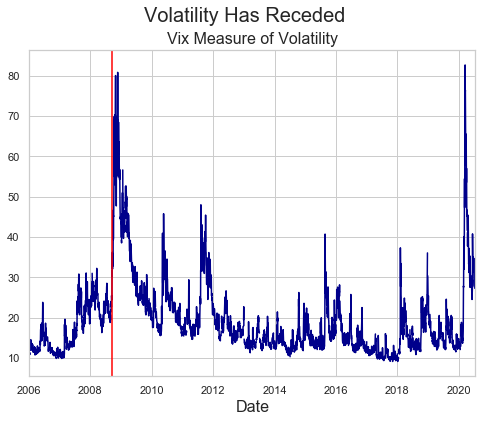

In [10]:
vix = fred.get_series("VIXCLS", observation_start='2006-01-01')
vix.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Volatility Has Receded', fontsize=20)
plt.title('Vix Measure of Volatility', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
#plt.axvline(dt.datetime(2020, 1, 1), color='black')

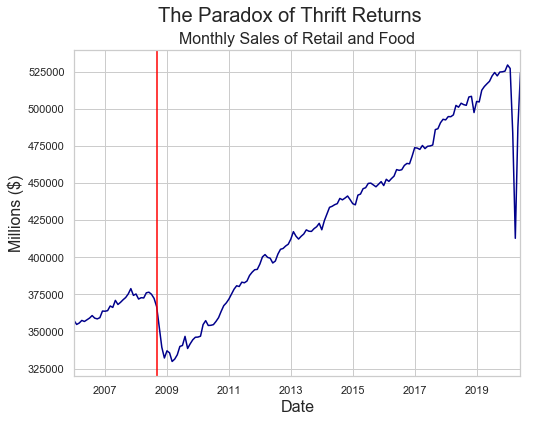

In [11]:
sales = fred.get_series("RSAFS", observation_start='2006-01-01')
sales.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('The Paradox of Thrift Returns', fontsize=20)
plt.title('Monthly Sales of Retail and Food', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

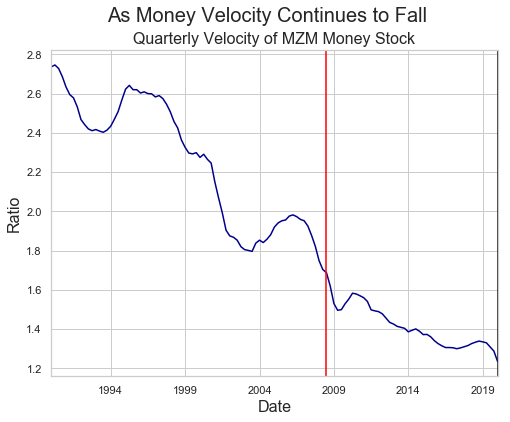

In [12]:
velocity = fred.get_series("MZMV", observation_start='1990-01-01')
velocity.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('As Money Velocity Continues to Fall', fontsize=20)
plt.title('Quarterly Velocity of MZM Money Stock', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Ratio', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axvline(dt.datetime(2020, 1, 1), color='black')

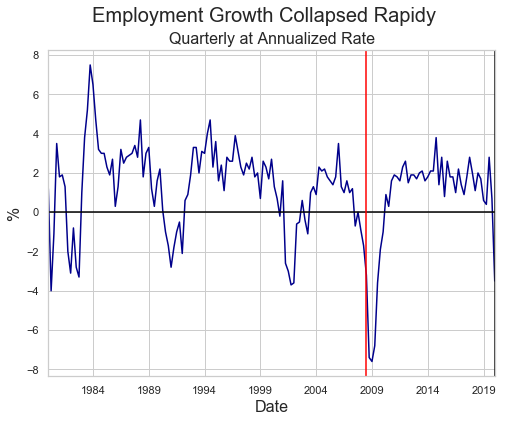

In [13]:
emp_growth = fred.get_series("PRS85006012", observation_start='1980-01-01')
emp_growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Employment Growth Collapsed Rapidy', fontsize=20)
plt.title('Quarterly at Annualized Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axvline(dt.datetime(2020, 1, 1), color='black')

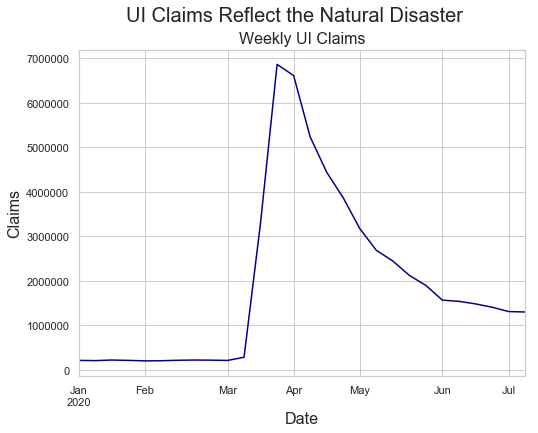

In [14]:
claims = fred.get_series("ICSA", observation_start='2020-01-01')
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('UI Claims Reflect the Natural Disaster', fontsize=20)
plt.title('Weekly UI Claims', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Claims', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

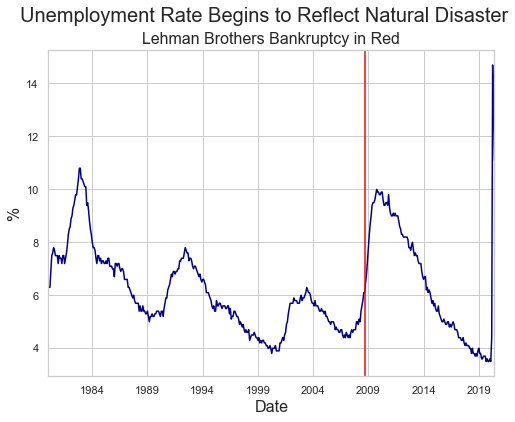

In [15]:
unemp_rate = fred.get_series("UNRATE", observation_start='1980-01-01')
unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Unemployment Rate Begins to Reflect Natural Disaster', fontsize=20)
plt.title('Lehman Brothers Bankruptcy in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

## Economic Implications

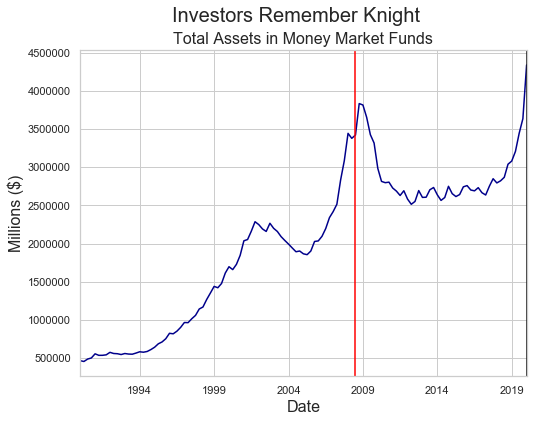

In [16]:
cash = fred.get_series("MMMFFAQ027S", observation_start='1990-01-01')
cash.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Investors Remember Knight', fontsize=20)
plt.title('Total Assets in Money Market Funds', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axvline(dt.datetime(2020, 1, 1), color='black')

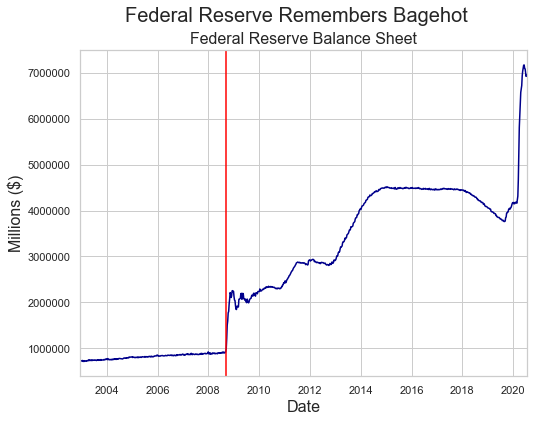

In [17]:
balance_sheet = fred.get_series("WALCL", observation_start='2000-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Reserve Remembers Bagehot', fontsize=20)
plt.title('Federal Reserve Balance Sheet', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

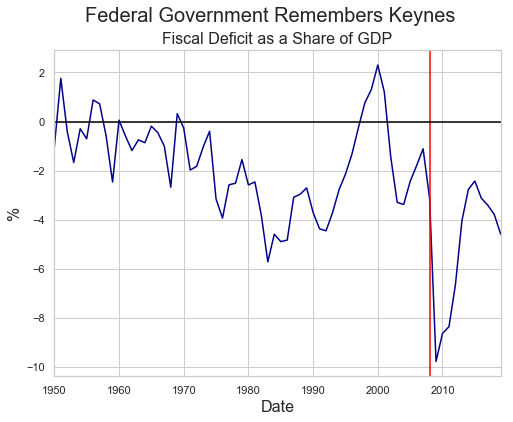

In [18]:
def_as_share = fred.get_series("FYFSGDA188S", observation_start='1950-01-01')
def_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Government Remembers Keynes', fontsize=20)
plt.title('Fiscal Deficit as a Share of GDP', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axhline(0.0, color="black")

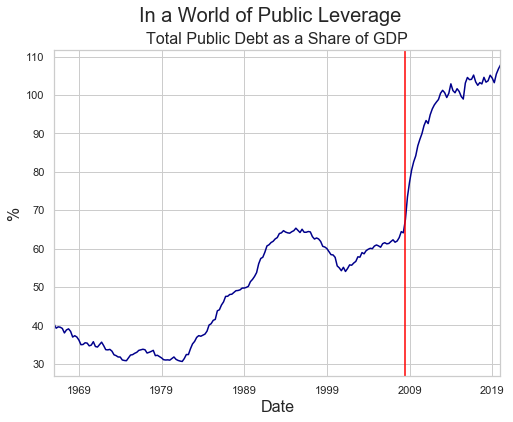

In [19]:
debt_as_share = fred.get_series("GFDEGDQ188S", observation_start='1950-01-01')
debt_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('In a World of Public Leverage', fontsize=20)
plt.title('Total Public Debt as a Share of GDP', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

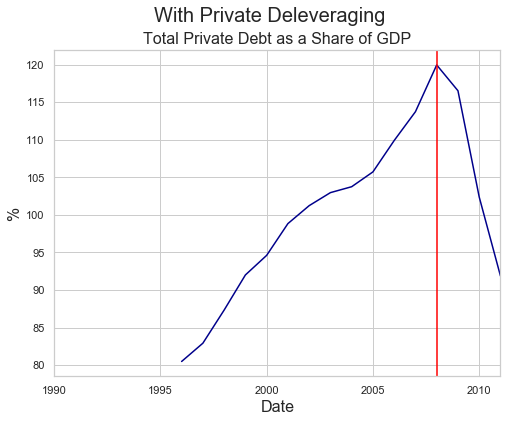

In [20]:
debt_as_share = fred.get_series("DDDM03USA156NWDB", observation_start='1950-01-01')
debt_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('With Private Deleveraging', fontsize=20)
plt.title('Total Private Debt as a Share of GDP', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

## 1929 and Today: 
## We Have Returned to an Absence of Data

In [21]:
covid = pd.read_csv('https://covidtracking.com/api/us/daily.csv')
covid['date'] = pd.to_datetime(covid['date'], format='%Y%m%d')
covid = covid.sort_values('date')
covid['rate'] = covid['positive'] / covid['posNeg'] * 100
covid = covid.iloc[45:]
covid['growth'] = covid['totalTestResultsIncrease'].pct_change(periods=1) * 100

(array([737485., 737506., 737516., 737537., 737546., 737567., 737577.,
        737598., 737607., 737628.]), <a list of 10 Text xticklabel objects>)

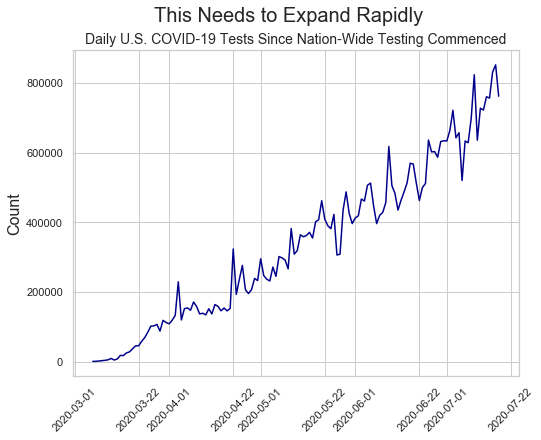

In [22]:
plt.figure(figsize=(8, 6))
plt.suptitle('This Needs to Expand Rapidly', fontsize=20)
plt.title('Daily U.S. COVID-19 Tests Since Nation-Wide Testing Commenced', fontsize=14)
plt.plot(covid['date'], covid['totalTestResultsIncrease'], color='darkblue')
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45)
# source: https://covidtracking.com/api/us/daily.csv

(array([737506., 737516., 737537., 737546., 737567., 737577., 737598.,
        737607., 737628.]), <a list of 9 Text xticklabel objects>)

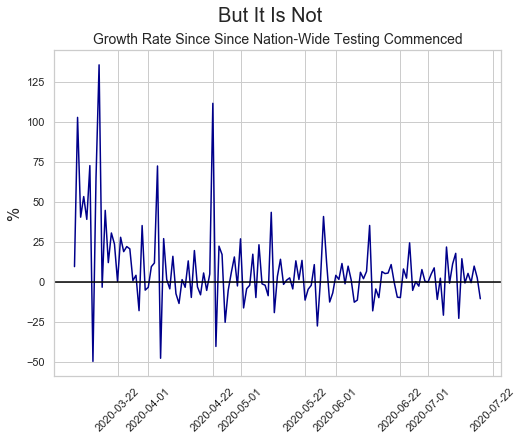

In [23]:
plt.figure(figsize=(8, 6))
plt.suptitle('But It Is Not', fontsize=20)
plt.title('Growth Rate Since Since Nation-Wide Testing Commenced', fontsize=14)
plt.plot(covid['date'], covid['growth'], color='darkblue')
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.xticks(rotation=45)
# source: https://covidtracking.com/api/us/daily.csv and author's calculation

(array([737485., 737506., 737516., 737537., 737546., 737567., 737577.,
        737598., 737607., 737628.]), <a list of 10 Text xticklabel objects>)

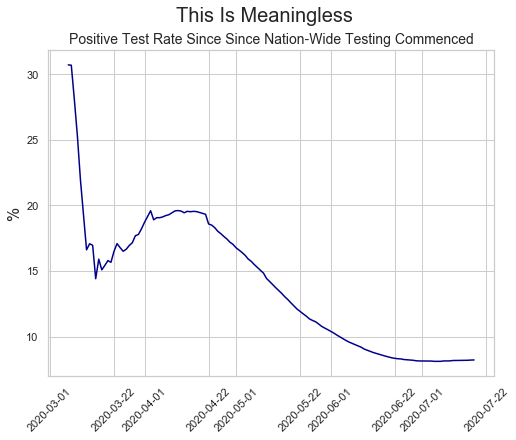

In [24]:
plt.figure(figsize=(8, 6))
plt.suptitle('This Is Meaningless', fontsize=20)
plt.title('Positive Test Rate Since Since Nation-Wide Testing Commenced', fontsize=14)
plt.plot(covid['date'], covid['rate'], color='darkblue')
plt.ylabel('%', fontsize=16)
plt.xticks(rotation=45)
# source: https://covidtracking.com/api/us/daily.csv and author's calculation

# Thank You

## Q&A